In [2]:
%matplotlib inline

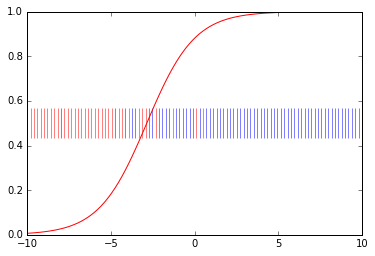

In [64]:
'''Implementation of logistic regression with numpy'''

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
# We generate 20 points
x = np.linspace(-10, 10, 100)
X = np.vstack([np.ones_like(x), x])
beta = np.array([2.0, 0.7])

linear = beta.T.dot(X)

p_y = np.exp(linear) / (1 + np.exp(linear))
y = np.random.rand(p_y.shape[0]) < p_y

plt.plot(x[y], y[y] - 0.5, '|', markersize=30.0)
plt.plot(x[~y], y[~y] + 0.5, '|', color='r', markersize=30.0)
plt.plot(x, p_y, color='r', markersize=30.0)
plt.show()
y = y.astype(float)

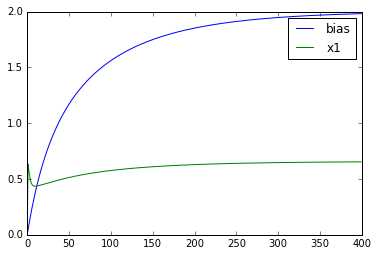

In [67]:
'''We want to determine the best logstic model that represents
this dataset and we can do with logistic regression'''

def log_likelihood(x, y, beta):
    linear = beta.T.dot(x)
    p = np.exp(linear) / (1 + np.exp(linear))
    lik = y * linear - np.log1p(np.exp(linear))
    return lik.sum()


# Likelihood gradient for logistic regression
def calc_gradient(x, y, beta):
    p = np.exp(beta.T.dot(x)) / (1 + np.exp(beta.T.dot(x)))
    
    grad = x * (y - p)
    return grad.sum(axis=1)

beta_est = np.array([0.0, 0.0])
alpha = 0.003
niter = 400

convergence = []
for i in range(niter):
    convergence.append(beta_est.copy())
    grad = calc_gradient(X, y, beta_est)
    beta_est += alpha * grad

convergence = np.array(convergence)

plt.plot(range(niter), convergence[:, 0], label='bias')
plt.plot(range(niter), convergence[:, 1], label='x1')
plt.legend()